<a href="https://colab.research.google.com/github/Mhtag/feature_engineering/blob/main/Handling_imbalanced_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Handling imbalanced data in customer churn prediction
Customer churn prediction is to measure why customers are leaving a business. In this tutorial we will be looking at customer churn in telecom business. We will build a deep learning model to predict the churn and use precision,recall, f1-score to measure performance of our model. We will then handle imbalance in data using various techniques and improve f1-score

In [60]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf
%matplotlib inline

In [61]:
df = pd.read_csv("https://raw.githubusercontent.com/codebasics/deep-learning-keras-tf-tutorial/master/14_imbalanced/customer_churn.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1867,0923-PNFUB,Female,0,No,No,3,Yes,No,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,No,Electronic check,83.75,247.25,Yes
3000,7613-LLQFO,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55,Yes
1615,2812-REYAT,Female,0,Yes,No,49,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Bank transfer (automatic),20.05,923.1,No
3775,1866-RZZQS,Male,1,No,No,41,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.40,4187.75,Yes
6559,1427-VERSM,Female,0,Yes,No,56,Yes,No,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,98.70,5669.5,No


In [62]:
df.drop('customerID',axis='columns',inplace=True)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [64]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [65]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [66]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No



Remove rows with space in TotalCharges

In [67]:
df1 = df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [68]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [69]:
df1.TotalCharges.dtype

dtype('float64')

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


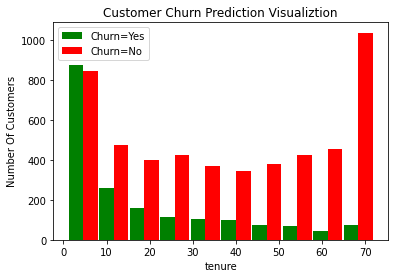

In [70]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")
plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


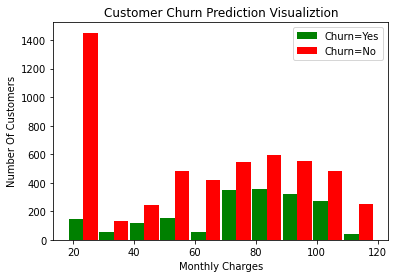

In [71]:
mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges      
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges      

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [72]:
for column in df1:
  if df1[column].dtypes=='object':
      print(f'{column}: {df1[column].unique()}')

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [73]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4389: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [74]:
yes_no_columns = []
for column in df1:
  if df1[column].dtypes == 'object':
    if set(df1[column].unique()) == set(['Yes', 'No']):
      #print(f'{column}', df1[column].unique())
      yes_no_columns.append(column)

print(yes_no_columns)

['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']


In [75]:
for column in yes_no_columns:
  df1[column].replace({'Yes':1,'No':0}, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [76]:
for column in df1:
  print(f'{column}', df1[column].unique())

gender ['Female' 'Male']
SeniorCitizen [0 1]
Partner [1 0]
Dependents [0 1]
tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService [0 1]
MultipleLines [0 1]
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity [0 1]
OnlineBackup [1 0]
DeviceProtection [0 1]
TechSupport [0 1]
StreamingTV [0 1]
StreamingMovies [0 1]
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling [1 0]
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn [0 1]


In [77]:
df2 = pd.get_dummies(df1)

In [78]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
col_to_scale = ['tenure','MonthlyCharges','TotalCharges']
df2[col_to_scale] = scaler.fit_transform(df2[col_to_scale])

In [79]:
X = df2.drop('Churn', axis=1)
y = df2.Churn


In [80]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [81]:
X_train[:5]

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,gender_Female,gender_Male,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3974,0,1,0,0.507042,1,1,1,0,1,0,1,1,0,0.606965,0.333833,0,1,1,0,0,0,1,0,0,0,0,1
5353,0,0,0,0.281690,1,0,0,0,1,0,0,1,0,0.431841,0.158643,0,1,1,0,0,1,0,0,0,0,0,1
3527,0,1,0,0.000000,1,1,0,0,0,0,0,0,1,0.560697,0.006439,0,1,0,1,0,1,0,0,1,0,0,0
738,1,0,0,0.577465,1,1,0,1,0,0,0,0,1,0.607960,0.383718,0,1,0,1,0,1,0,0,1,0,0,0
3474,1,1,1,0.901408,1,1,1,1,0,0,0,0,1,0.671642,0.654241,0,1,0,1,0,1,0,0,0,0,1,0


In [82]:
X_train.shape

(5625, 27)

In [83]:
from sklearn.metrics import classification_report, confusion_matrix

In [84]:
def ANN(X,y, epochs=10, loss=tf.keras.losses.BinaryCrossentropy()):
  """ Return y_test, y_preds"""
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

  model = tf.keras.Sequential([
    tf.keras.layers.Dense(27,activation = 'relu', input_shape=(27,)),
    tf.keras.layers.Dense(9, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  model.compile(loss=loss,
              optimizer='adam',
              metrics=['accuracy'])

  history = model.fit(X_train, y_train, epochs=epochs)

  print()
  print('model_score: ',model.evaluate(X_test, y_test))

  y_preds = model.predict(X_test)
  y_preds = np.round(y_preds)
  print()
  print("Classification Report: \n", classification_report(y_test, y_preds))
  
  return y_test, y_preds

In [85]:
y_test, y_preds = ANN(X,y)

Epoch 1/10
176/176 [==============================] - 1s 2ms/step - loss: 0.5100 - accuracy: 0.7436
Epoch 2/10
176/176 [==============================] - 0s 2ms/step - loss: 0.4329 - accuracy: 0.7893
Epoch 3/10
176/176 [==============================] - 0s 2ms/step - loss: 0.4248 - accuracy: 0.8004
Epoch 4/10
176/176 [==============================] - 0s 2ms/step - loss: 0.4198 - accuracy: 0.8046
Epoch 5/10
176/176 [==============================] - 0s 2ms/step - loss: 0.4176 - accuracy: 0.8057
Epoch 6/10
176/176 [==============================] - 0s 2ms/step - loss: 0.4149 - accuracy: 0.8052
Epoch 7/10
176/176 [==============================] - 0s 2ms/step - loss: 0.4146 - accuracy: 0.8068
Epoch 8/10
176/176 [==============================] - 0s 2ms/step - loss: 0.4128 - accuracy: 0.8064
Epoch 9/10
176/176 [==============================] - 0s 2ms/step - loss: 0.4102 - accuracy: 0.8073
Epoch 10/10
176/176 [==============================] - 0s 2ms/step - loss: 0.4089 - accuracy: 0.8069

## Mitigating Skewness the data



### Undersampling

In [86]:
class_0, class_1 = df2.Churn.value_counts()
class_0, class_1

(5163, 1869)

In [87]:
df_class_0 = df2[df2.Churn == 0]
df_class_1 = df2[df2.Churn == 1]
df_class_0.shape, df_class_1.shape 

((5163, 28), (1869, 28))

In [88]:
df_class_0_under = df_class_0.sample(class_1)
df_class_0_under.shape, df_class_1.shape

((1869, 28), (1869, 28))

In [89]:
df_under = pd.concat([df_class_0_under, df_class_1], axis=0)
df_under.Churn.value_counts()

1    1869
0    1869
Name: Churn, dtype: int64

In [90]:
X = df_under.drop('Churn',axis='columns')
y = df_under['Churn']

In [91]:
y_test, y_pred_under = ANN(X,y)

Epoch 1/10
94/94 [==============================] - 1s 2ms/step - loss: 0.6058 - accuracy: 0.7020
Epoch 2/10
94/94 [==============================] - 0s 2ms/step - loss: 0.5161 - accuracy: 0.7592
Epoch 3/10
94/94 [==============================] - 0s 2ms/step - loss: 0.5013 - accuracy: 0.7625
Epoch 4/10
94/94 [==============================] - 0s 2ms/step - loss: 0.4946 - accuracy: 0.7605
Epoch 5/10
94/94 [==============================] - 0s 2ms/step - loss: 0.4912 - accuracy: 0.7605
Epoch 6/10
94/94 [==============================] - 0s 2ms/step - loss: 0.4876 - accuracy: 0.7656
Epoch 7/10
94/94 [==============================] - 0s 2ms/step - loss: 0.4867 - accuracy: 0.7649
Epoch 8/10
94/94 [==============================] - 0s 2ms/step - loss: 0.4824 - accuracy: 0.7669
Epoch 9/10
94/94 [==============================] - 0s 2ms/step - loss: 0.4813 - accuracy: 0.7672
Epoch 10/10
94/94 [==============================] - 0s 2ms/step - loss: 0.4788 - accuracy: 0.7656

24/24 [===========

### OverSampling

In [92]:
classcount_0, classcount_1 = df2.Churn.value_counts()
classcount_0, classcount_1

(5163, 1869)

In [93]:
df_class_0.shape, df_class_1.shape

((5163, 28), (1869, 28))

In [94]:
df_class_1_over = df_class_1.sample(classcount_0, replace=True)
df_class_1_over.shape

(5163, 28)

In [95]:
df_over = pd.concat([df_class_0, df_class_1_over], axis=0)
df_over.Churn.value_counts()

1    5163
0    5163
Name: Churn, dtype: int64

In [96]:
X = df_over.drop('Churn', axis=1)
y = df_over.Churn

In [97]:
y_test, y_preds_over = ANN(X,y)

Epoch 1/10
259/259 [==============================] - 1s 2ms/step - loss: 0.5555 - accuracy: 0.7248
Epoch 2/10
259/259 [==============================] - 1s 2ms/step - loss: 0.4942 - accuracy: 0.7581
Epoch 3/10
259/259 [==============================] - 0s 2ms/step - loss: 0.4855 - accuracy: 0.7632
Epoch 4/10
259/259 [==============================] - 0s 2ms/step - loss: 0.4806 - accuracy: 0.7673
Epoch 5/10
259/259 [==============================] - 0s 2ms/step - loss: 0.4769 - accuracy: 0.7692
Epoch 6/10
259/259 [==============================] - 1s 2ms/step - loss: 0.4738 - accuracy: 0.7696
Epoch 7/10
259/259 [==============================] - 1s 2ms/step - loss: 0.4716 - accuracy: 0.7732
Epoch 8/10
259/259 [==============================] - 0s 2ms/step - loss: 0.4676 - accuracy: 0.7732
Epoch 9/10
259/259 [==============================] - 0s 2ms/step - loss: 0.4652 - accuracy: 0.7762
Epoch 10/10
259/259 [==============================] - 0s 2ms/step - loss: 0.4633 - accuracy: 0.7795

### **SMOTE**

In [98]:
X = df2.drop('Churn', axis=1)
y = df2.Churn

In [99]:
from imblearn.over_sampling import SMOTE


In [100]:
smote = SMOTE(sampling_strategy='minority')

In [106]:
X_sm, y_sm = smote.fit_sample(X,y) 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [109]:
y_sm.shape


(10326,)

In [110]:
y_test, y_preds_sm = ANN(X_sm,y_sm)

Epoch 1/10
259/259 [==============================] - 1s 2ms/step - loss: 0.5599 - accuracy: 0.7358
Epoch 2/10
259/259 [==============================] - 0s 2ms/step - loss: 0.4779 - accuracy: 0.7737
Epoch 3/10
259/259 [==============================] - 0s 2ms/step - loss: 0.4711 - accuracy: 0.7776
Epoch 4/10
259/259 [==============================] - 0s 2ms/step - loss: 0.4662 - accuracy: 0.7800
Epoch 5/10
259/259 [==============================] - 0s 2ms/step - loss: 0.4630 - accuracy: 0.7821
Epoch 6/10
259/259 [==============================] - 0s 2ms/step - loss: 0.4604 - accuracy: 0.7822
Epoch 7/10
259/259 [==============================] - 1s 2ms/step - loss: 0.4566 - accuracy: 0.7864
Epoch 8/10
259/259 [==============================] - 0s 2ms/step - loss: 0.4546 - accuracy: 0.7852
Epoch 9/10
259/259 [==============================] - 1s 2ms/step - loss: 0.4520 - accuracy: 0.7884
Epoch 10/10
259/259 [==============================] - 1s 2ms/step - loss: 0.4490 - accuracy: 0.7908